<a href="https://colab.research.google.com/github/rajadevineni/Image_Denoising_autoencoder/blob/master/Convolutional_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11493376/11490434 [==============================] - 0s 0us/step


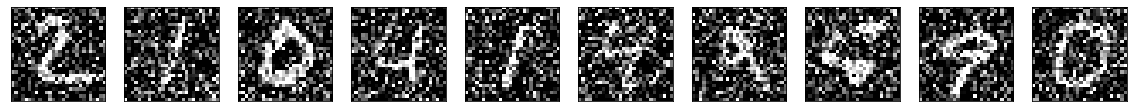

In [3]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

60000/60000 [==============================] - 152s 3ms/step - loss: 0.0948 - val_loss: 0.0944
Epoch 72/100
60000/60000 [==============================] - 150s 2ms/step - loss: 0.0947 - val_loss: 0.0941
Epoch 73/100
60000/60000 [==============================] - 150s 2ms/step - loss: 0.0947 - val_loss: 0.0950
Epoch 74/100
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0947 - val_loss: 0.0943
Epoch 75/100
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0946 - val_loss: 0.0942
Epoch 76/100
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0946 - val_loss: 0.0945
Epoch 77/100
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0946 - val_loss: 0.0940
Epoch 78/100
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0945 - val_loss: 0.0945
Epoch 79/100
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0945 - val_loss: 0.0941
Epoch 80/100
60000/60000 [===============

In [12]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0   

In [20]:
evaluation = autoencoder.evaluate(x_test_noisy.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1))

10000/10000 [==============================] - 7s 698us/step


In [24]:
#autoencoder.evaluate(x_test_noisy.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1))
autoencoder.evaluate(x_test_noisy,x_test)

10000/10000 [==============================] - 7s 696us/step


0.09369765325784683

In [25]:
#predicted = autoencoder.predict(x_test_noisy[:10].reshape(-1,28,28,1))
predicted = autoencoder.predict(x_test_noisy[:10])

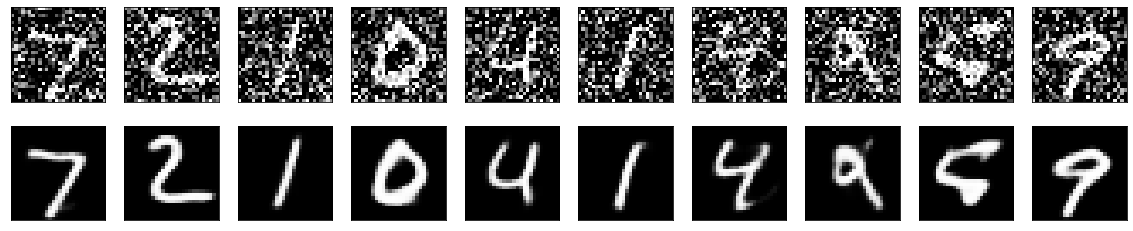

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey= True, figsize = (20,4))

for images, row in zip([x_test_noisy[:10], predicted], axes):
  for img, ax in zip(images,row):
    ax.imshow(img.reshape(28,28), cmap ='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [18]:
autoencoder.save("auto_encoder")